## Left Join 

#### Counting missing rows with left join
The Movie Database is supported by volunteers going out into the world, collecting data, and entering it into the database. This includes financial data, such as movie budget and revenue. If you wanted to know which movies are still missing data, you could use a left join to identify them. Practice using a left join by merging the movies table and the financials table.

In [38]:
import pickle as pkl

#Converting .pkl or .p extension into the .csv extension
import pandas as pd

with open("movies.p", "rb") as f:
    object = pkl.load(f)
movies = pd.DataFrame(object)
movies.to_csv(r'movies.csv')
#########################################
with open("financials.p", "rb") as f:
    object = pkl.load(f)
financials = pd.DataFrame(object)
financials.to_csv(r'financials.csv')
    

In [39]:
print(movies.head())

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17


In [40]:
print(financials.head())

       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08


In [41]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on = "id", how = "left")
print(movies_financials.head())

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum() # isnull() method can be used instead of isna() too

# Print the number of movies missing financials
print(number_of_missing_fin)

      id                 title  popularity release_date      budget  \
0    257          Oliver Twist   20.415572   2005-09-23  50000000.0   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12         NaN   
2  38365             Grown Ups   38.864027   2010-06-24  80000000.0   
3   9672              Infamous    3.680896   2006-11-16  13000000.0   
4  12819       Alpha and Omega   12.300789   2010-09-17  20000000.0   

       revenue  
0   42093706.0  
1          NaN  
2  271430189.0  
3    1151330.0  
4   39300000.0  
1574


#### Enriching a dataset
Setting how='left' with the .merge()method is a useful technique for enriching or enhancing a dataset with additional information from a different table. In this exercise, you will start off with a sample of movie data from the movie series Toy Story. Your goal is to enrich this data by adding the marketing tag line for each movie. You will compare the results of a left join versus an inner join.

In [42]:
#Converting .pkl or .p extension into the .csv extension
with open("taglines.p", "rb") as f:
    object = pkl.load(f)
taglines = pd.DataFrame(object)
taglines.to_csv(r'taglines.csv')

toy_story = pd.read_csv("toy_story.csv")

In [43]:
taglines

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."
...,...,...
4795,124606,Sometimes you've got to break the rules
4796,14337,What happens if it actually works?
4798,9367,"He didn't come looking for trouble, but troubl..."
4799,72766,A newlywed couple's honeymoon is upended by th...


In [44]:
toy_story

,id,title,popularity,release_date
0,10193,Toy Story 3,59.995,2010-06-16
1,863,Toy Story 2,73.575,1999-10-30
2,862,Toy Story,73.640,1995-10-30


In [45]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on = "id", how = "left")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
2    862    Toy Story      73.640   1995-10-30                       NaN
(3, 5)


In [46]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on = "id") # we dont need to add how = "inner", 
                                                    # because default value is already inner

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3      59.995   2010-06-16  No toy gets left behind.
1    863  Toy Story 2      73.575   1999-10-30        The toys are back!
(2, 5)


That's fantastic work! If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.

#### How many rows with a left join?
Select the true statement about left joins. Try running the following code statements in the IPython shell.

left_table.merge(one_to_one, on='id', how='left').shape<br>
left_table.merge(one_to_many, on='id', how='left').shape<br>
Note that the left_table starts out with 4 rows.

a)The output of a one-to-one merge with a left join will have more rows than the left table.<br>
b)The output of a one-to-one merge with a left join will have fewer rows than the left table.<br>
<strong>c)The output of a one-to-many merge with a left join will have greater than or equal rows than the left table.</strong>

## Right Join

#### Right join to find unique movies
Most of the recent big-budget science fiction movies can also be classified as action movies. You are given a table of science fiction movies called scifi_movies and another table of action movies called action_movies. Your goal is to find which movies are considered only science fiction movies. Once you have this table, you can merge the movies table in to see the movie names. Since this exercise is related to science fiction movies, use a right join as your superhero power to solve this problem.

In [47]:
movie_to_genres = pd.read_csv("movie_to_genres.csv")

action_movies = movie_to_genres[movie_to_genres["genre"]=="Action"]
print(action_movies.head())

scifi_movies = movie_to_genres[movie_to_genres["genre"]=="Science Fiction"]
print(scifi_movies.head())


    Unnamed: 0  movie_id   genre
3            3        11  Action
14          14        18  Action
25          25        22  Action
26          26        24  Action
42          42        58  Action
    Unnamed: 0  movie_id            genre
2            2        11  Science Fiction
17          17        18  Science Fiction
20          20        19  Science Fiction
38          38        38  Science Fiction
49          49        62  Science Fiction


In [48]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes = (["_act","_sci"]))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head(), "\n")

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi["genre_act"].isnull()]
print(scifi_only.head(), "\n")

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, how = "inner", left_on = "id", right_on = "movie_id")

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head(), "\n")
print(movies_and_scifi_only.shape, "\n")

   Unnamed: 0_act  movie_id genre_act  Unnamed: 0_sci        genre_sci
0             3.0        11    Action               2  Science Fiction
1            14.0        18    Action              17  Science Fiction
2            95.0        95    Action              97  Science Fiction
3           117.0       106    Action             115  Science Fiction
4           179.0       154    Action             181  Science Fiction 

     Unnamed: 0_act  movie_id genre_act  Unnamed: 0_sci        genre_sci
277             NaN        19       NaN              20  Science Fiction
278             NaN        38       NaN              38  Science Fiction
279             NaN        62       NaN              49  Science Fiction
280             NaN        68       NaN              55  Science Fiction
281             NaN        74       NaN              66  Science Fiction 

      id                         title  popularity release_date  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12  

#### Popular genres with right join
What are the genres of the most popular movies? To answer this question, you need to merge data from the movies and movie_to_genres tables. In a table called pop_movies, the top 10 most popular movies in the movies table have been selected. To ensure that you are analyzing all of the popular movies, merge it with the movie_to_genres table using a right join. To complete your analysis, count the number of different genres. Also, the two tables can be merged by the movie ID. However, in pop_movies that column is called id, and in movies_to_genres it's called movie_id.

In [49]:
movies

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17
...,...,...,...,...
4798,3089,Red River,5.344815,1948-08-26
4799,11934,The Hudsucker Proxy,14.188982,1994-03-11
4800,13807,Exiled,8.486390,2006-09-06
4801,73873,Albert Nobbs,7.802245,2011-12-21


In [50]:
popularity_10 = movies.sort_values("popularity", ascending = False).iloc[0:10, 2:3]
popularity_10

,popularity
4546,875.581305
4343,724.247784
1966,514.569956
2423,481.098624
4220,434.278564
1867,418.708552
4375,271.972889
1106,243.791743
4216,206.227151
2614,203.734590


In [51]:
movies_pop = movies.merge(popularity_10, on = "popularity", how = "right")#.sort_values("popularity", ascending = False)
movies_pop

,id,title,popularity,release_date
0,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
1,135397,Jurassic World,418.708552,2015-06-09
2,293660,Deadpool,514.569956,2016-02-09
3,118340,Guardians of the Galaxy,481.098624,2014-07-30
4,177572,Big Hero 6,203.734590,2014-10-24
5,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
6,76341,Mad Max: Fury Road,434.278564,2015-05-13
7,157336,Interstellar,724.247784,2014-11-05
8,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
9,211672,Minions,875.581305,2015-06-17


In [52]:
movies_pop2 = movies.merge(popularity_10, on = "popularity", how = "right").sort_values("popularity", ascending = False)
movies_pop2

,id,title,popularity,release_date
9,211672,Minions,875.581305,2015-06-17
7,157336,Interstellar,724.247784,2014-11-05
2,293660,Deadpool,514.569956,2016-02-09
3,118340,Guardians of the Galaxy,481.098624,2014-07-30
6,76341,Mad Max: Fury Road,434.278564,2015-05-13
1,135397,Jurassic World,418.708552,2015-06-09
8,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
0,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
5,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
4,177572,Big Hero 6,203.734590,2014-10-24


In [53]:
pop_movies = movies.merge(popularity_10, on = "popularity", how = "inner").sort_values("popularity", ascending = False)
pop_movies

,id,title,popularity,release_date
9,211672,Minions,875.581305,2015-06-17
7,157336,Interstellar,724.247784,2014-11-05
2,293660,Deadpool,514.569956,2016-02-09
3,118340,Guardians of the Galaxy,481.098624,2014-07-30
6,76341,Mad Max: Fury Road,434.278564,2015-05-13
1,135397,Jurassic World,418.708552,2015-06-09
8,22,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003-07-09
0,119450,Dawn of the Planet of the Apes,243.791743,2014-06-26
5,131631,The Hunger Games: Mockingjay - Part 1,206.227151,2014-11-18
4,177572,Big Hero 6,203.734590,2014-10-24


    Unnamed: 0  movie_id            genre      id  \
0           23        22          Fantasy      22   
1           24        22        Adventure      22   
2           25        22           Action      22   
3         9949     76341           Action   76341   
4         9950     76341  Science Fiction   76341   
5         9951     76341        Adventure   76341   
6         9952     76341         Thriller   76341   
7        10536    118340        Adventure  118340   
8        10537    118340  Science Fiction  118340   
9        10538    118340           Action  118340   
10       10547    119450           Action  119450   
11       10548    119450            Drama  119450   
12       10549    119450         Thriller  119450   
13       10550    119450  Science Fiction  119450   
14       10615    131631         Thriller  131631   
15       10616    131631        Adventure  131631   
16       10617    131631  Science Fiction  131631   
17       10648    135397         Thriller  135

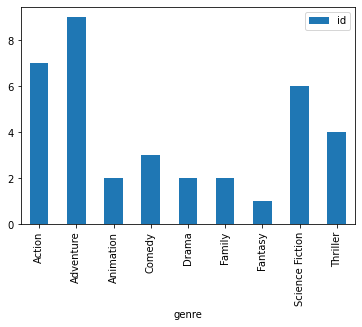

In [54]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how = "right", 
                                    left_on = "movie_id", right_on = "id" )
print(genres_movies)
# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})
print(genre_count)

#import plotting library
import matplotlib.pyplot as plt

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

#### Using outer join to select actors
One cool aspect of using an outer join is that, because it returns all rows from both merged tables and null where they do not match, you can use it to find rows that do not have a match in the other table. To try for yourself, you have been given two tables with a list of actors from two popular movies: Iron Man 1 and Iron Man 2. Most of the actors played in both movies. Use an outer join to find actors who did not act in both movies.

The Iron Man 1 table is called iron_1_actors, and Iron Man 2 table is called iron_2_actors. Both tables have been loaded for you and a few rows printed so you can see the structure.



In [55]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors, on = "id",
                                   how = "outer",
                                   suffixes=(["_1","_2"]))
print(iron_1_and_2)

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

NameError: name 'iron_1_actors' is not defined

iron_1_actors ve iron_2_actors datasetleri olmadığı için verileri göremiyoruz. 

## Merge table with itself

#### Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column. In this exercise, you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

In [56]:
crews = pd.read_csv("crews.csv")
print(crews.head())

   Unnamed: 0     id  department             job               name
0           0  19995     Editing          Editor  Stephen E. Rivkin
1           2  19995       Sound  Sound Designer  Christopher Boyes
2           4  19995  Production         Casting          Mali Finn
3           6  19995   Directing        Director      James Cameron
4           7  19995     Writing          Writer      James Cameron


In [57]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on = "id", how = "inner", 
                                suffixes = (["_dir","_crew"]))
print(crews_self_merged)

        Unnamed: 0_dir     id department_dir   job_dir           name_dir  \
0                    0  19995        Editing    Editor  Stephen E. Rivkin   
1                    0  19995        Editing    Editor  Stephen E. Rivkin   
2                    0  19995        Editing    Editor  Stephen E. Rivkin   
3                    0  19995        Editing    Editor  Stephen E. Rivkin   
4                    0  19995        Editing    Editor  Stephen E. Rivkin   
...                ...    ...            ...       ...                ...   
834189          129579  25975      Directing  Director           Jon Gunn   
834190          129580  25975      Directing  Director         Brett Winn   
834191          129580  25975      Directing  Director         Brett Winn   
834192          129580  25975      Directing  Director         Brett Winn   
834193          129580  25975      Directing  Director         Brett Winn   

        Unnamed: 0_crew department_crew            job_crew          name_c

In [58]:
# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on='id', how='inner',
                                suffixes=('_dir','_crew'))

# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

     Unnamed: 0_dir     id department_dir   job_dir       name_dir  \
156               6  19995      Directing  Director  James Cameron   
157               6  19995      Directing  Director  James Cameron   
158               6  19995      Directing  Director  James Cameron   
160               6  19995      Directing  Director  James Cameron   
161               6  19995      Directing  Director  James Cameron   

     Unnamed: 0_crew department_crew        job_crew          name_crew  
156                0         Editing          Editor  Stephen E. Rivkin  
157                2           Sound  Sound Designer  Christopher Boyes  
158                4      Production         Casting          Mali Finn  
160                7         Writing          Writer      James Cameron  
161               24             Art    Set Designer    Richard F. Mays  


<strong>Which one is false?</strong>

a)You can merge a table to itself with a right join.<br>
b)Merging a table to itself can allow you to compare values in a column to other values in the same column.<br>
<strong>c)The pandas module limits you to one merge where you merge a table to itself. You cannot repeat this process over and over.</strong><br>
d)Merging a table to itself is like working with two separate tables.


## Merging on Indexes

#### Index merge for movie ratings
To practice merging on indexes, you will merge movies and a table called ratings that holds info about movie ratings. Make sure your merge returns all of the rows from the movies table and not all the rows of ratings table need to be included in the result.

The movies and ratings tables have been loaded for you.

In [59]:
with open("ratings.p", "rb") as f:
    object = pkl.load(f)
ratings = pd.DataFrame(object)
ratings.to_csv(r'ratings.csv')


In [60]:
ratings = ratings.set_index("id")
print(ratings.head())

        vote_average  vote_count
id                              
19995            7.2     11800.0
285              6.9      4500.0
206647           6.3      4466.0
49026            7.6      9106.0
49529            6.1      2124.0


In [61]:
movies = movies.set_index("id")
print(movies.head())

                      title  popularity release_date
id                                                  
257            Oliver Twist   20.415572   2005-09-23
14290  Better Luck Tomorrow    3.877036   2002-01-12
38365             Grown Ups   38.864027   2010-06-24
9672               Infamous    3.680896   2006-11-16
12819       Alpha and Omega   12.300789   2010-09-17


In [62]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on = "id", how = "left")

# Print the first few rows of movies_ratings
print(movies_ratings.head())

                      title  popularity release_date  vote_average  vote_count
id                                                                            
257            Oliver Twist   20.415572   2005-09-23           6.7       274.0
14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5        27.0
38365             Grown Ups   38.864027   2010-06-24           6.0      1705.0
9672               Infamous    3.680896   2006-11-16           6.4        60.0
12819       Alpha and Omega   12.300789   2010-09-17           5.3       124.0


#### Do sequels earn more?
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [63]:
with open("sequels.p", "rb") as f:
    object = pkl.load(f)
sequels = pd.DataFrame(object)
sequels.to_csv(r'sequels.csv')

In [64]:
print(sequels.head())

      id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>


In [65]:
sequels = sequels.set_index("id")
print(sequels.head())

              title  sequel
id                         
19995        Avatar    <NA>
862       Toy Story     863
863     Toy Story 2   10193
597         Titanic    <NA>
24428  The Avengers    <NA>


In [66]:
print(financials.reset_index().head())

   index      id     budget       revenue
0      0   19995  237000000  2.787965e+09
1      1     285  300000000  9.610000e+08
2      2  206647  245000000  8.806746e+08
3      3   49026  250000000  1.084939e+09
4      4   49529  260000000  2.841391e+08


In [67]:
financials = financials.set_index("id")
print(financials.head())

           budget       revenue
id                             
19995   237000000  2.787965e+09
285     300000000  9.610000e+08
206647  245000000  8.806746e+08
49026   250000000  1.084939e+09
49529   260000000  2.841391e+08


In [68]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left').dropna()
print(sequels_fin.head())

                                                 title  sequel       budget  \
id                                                                            
862                                          Toy Story     863   30000000.0   
863                                        Toy Story 2   10193   90000000.0   
675          Harry Potter and the Order of the Phoenix     767  150000000.0   
121              The Lord of the Rings: The Two Towers     122   79000000.0   
120  The Lord of the Rings: The Fellowship of the Ring     121   93000000.0   

         revenue  
id                
862  373554033.0  
863  497366869.0  
675  938212738.0  
121  926287400.0  
120  871368364.0  


In [69]:
# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how="inner", left_on="sequel", 
                             right_on="id", right_index = True,
                             suffixes=("_org", "_seq"))
 
# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']
print(orig_seq.head())


       sequel                                          title_org  sequel_org  \
id                                                                             
862       863                                          Toy Story         863   
120       121  The Lord of the Rings: The Fellowship of the Ring         121   
36557   10764                                      Casino Royale       10764   
1771   100402                 Captain America: The First Avenger      100402   
87         89               Indiana Jones and the Temple of Doom          89   

        budget_org  revenue_org                              title_seq  \
id                                                                       
862     30000000.0  373554033.0                            Toy Story 2   
120     93000000.0  871368364.0  The Lord of the Rings: The Two Towers   
36557  150000000.0  599045960.0                      Quantum of Solace   
1771   140000000.0  370569774.0    Captain America: The Winter Soldie

In [70]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org','title_seq','diff']]
print(titles_diff.head())

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values("diff", ascending = False).head())


                                               title_org  \
id                                                         
862                                            Toy Story   
120    The Lord of the Rings: The Fellowship of the Ring   
36557                                      Casino Royale   
1771                  Captain America: The First Avenger   
87                  Indiana Jones and the Temple of Doom   

                                   title_seq         diff  
id                                                         
862                              Toy Story 2  123812836.0  
120    The Lord of the Rings: The Two Towers   54919036.0  
36557                      Quantum of Solace  -12955233.0  
1771     Captain America: The Winter Soldier  344196798.0  
87        Indiana Jones and the Last Crusade  141171806.0  
                                         title_org  \
id                                                   
1771            Captain America: The First Avenger 